#Baixar e Abrir as imagens

In [134]:
#imports
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np
import math
import matplotlib.image as mpimg
from PIL import Image
from PIL import ImageFilter

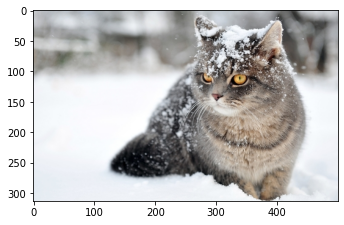

In [135]:
path = '/content/'
img1 = cv2.imread(path + 'lena.png')
img2 = cv2.imread(path + 'unequalized.jpg')
img3 = cv2.imread(path + 'img_aluno.jpg') 

plt.figure(figsize=(12,12)) 

plt.subplot(122)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))


#Manipulando a magem

##resize

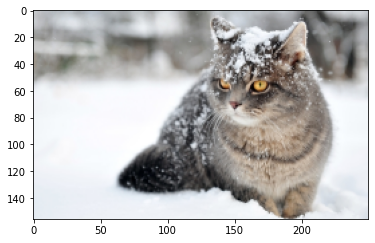

In [136]:
def resizeImage(img):
  scale_percent = 50
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  return cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

resized = resizeImage(img3)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

##conversão para níveis de cinza

In [137]:
def rgb_to_gray(img):
  grayImage = np.zeros(img.shape)
  R = np.array(img[:, :, 0])
  G = np.array(img[:, :, 1])
  B = np.array(img[:, :, 2])

  R = (R *.299)
  G = (G *.587)
  B = (B *.114)

  Avg = (R+G+B)
  grayImage = img.copy()

  for i in range(3):
    grayImage[:,:,i] = Avg
           
  return grayImage       

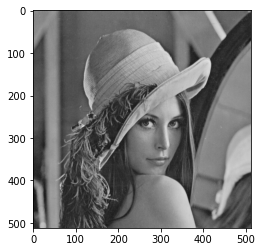

In [138]:
image = img1
grayImage = rgb_to_gray(image)  
plt.imshow(grayImage)
plt.show()

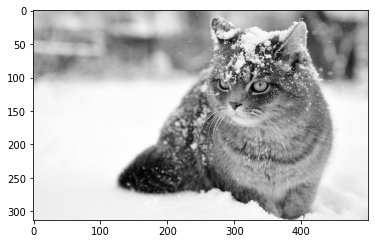

In [139]:
image = img3
grayImage = rgb_to_gray(image)  
plt.imshow(grayImage)
plt.show()

##gera o negatino nas imagens

In [140]:
def negativeImage(img):
  w,h=img.size
  for i in range(w):
    for j in range(h):
      r,g,b=img.getpixel((i,j))
      r=255-r
      g=255-g
      b=255-b
      img.putpixel((i,j),(r,g,b))
  plt.imshow(img) 

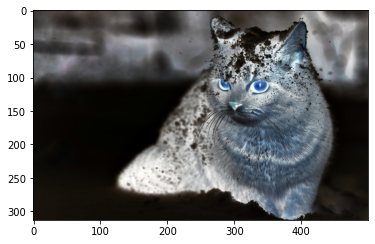

In [141]:
negative1=Image.open("/content/img_aluno.jpg")
negativeImage(negative1)

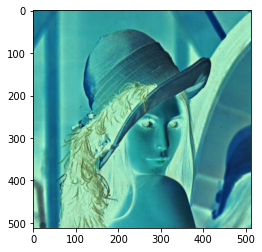

In [142]:
negative2=Image.open("/content/lena.png")
negative2 = negative2.convert('RGB')

negativeImage(negative2)

##ajuste de constraste

In [143]:
def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 128)
    return img.point(contrast)


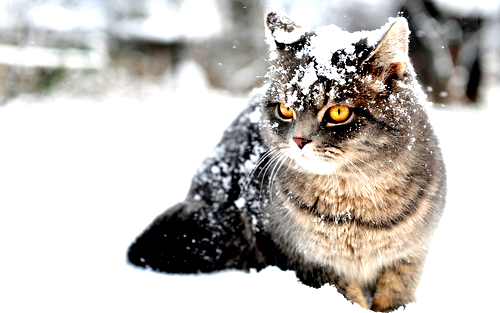

In [144]:
image = Image.open('/content/img_aluno.jpg')
change_contrast(image, 75)

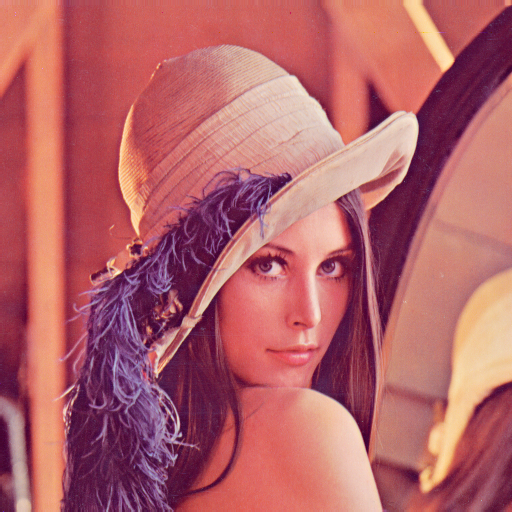

In [165]:
image = Image.open('/content/lena.png')
change_contrast(image, 0.01)

##operador logarítmico

In [146]:
def logTransform(c, f):
  g = c * math.log(float(1 + f),10)
  return g

def logTransformImage(imgA, outputMax = 255, inputMax=255):
  c = outputMax/math.log(inputMax+1,10)

  for i in range(0, imgA.size[0]-1):
    for j in range(0, imgA.size[1]-1):
      f = imgA.getpixel((i,j))

      imgA.putpixel((i,j),(round(logTransform(c, f[0])), 
                           round(logTransform(c, f[1])), 
                           round(logTransform(c, f[2])))
      )

  return imgA


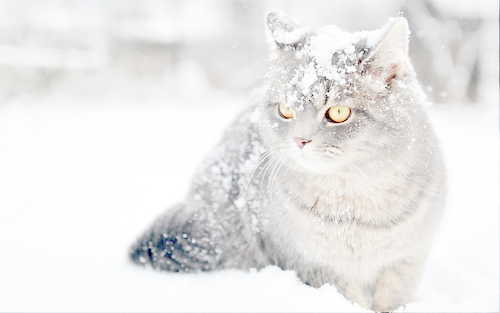

In [147]:
imgX = Image.open("/content/img_aluno.jpg")
logTransformedImage = logTransformImage(imgX)
logTransformedImage

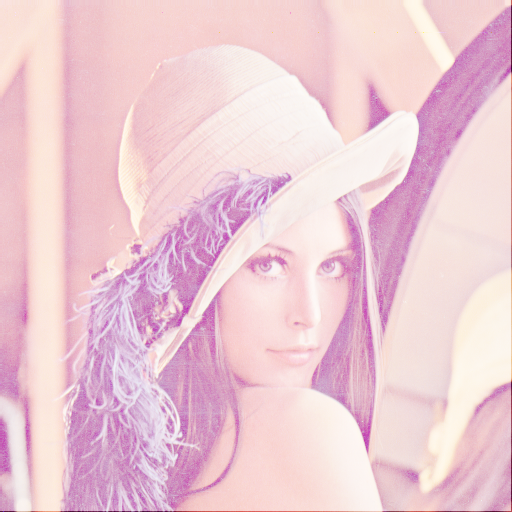

In [148]:
imgX = Image.open("/content/lena.png")
logTransformedImage = logTransformImage(imgX)
logTransformedImage

##operador logístco

In [149]:
def op_log(imgParam):
  img_sigm = (255/(1+np.exp(-0.03*(imgParam.astype(np.int32)-127)))).astype(np.uint8)

  plt.imshow(cv2.cvtColor(img_sigm, cv2.COLOR_BGR2RGB), cmap="gray")

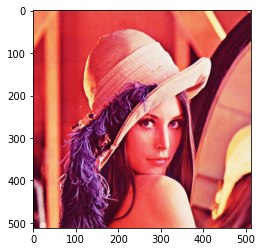

In [150]:
#lena
op_log(img1)

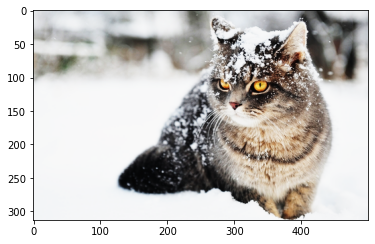

In [151]:
#img_aluno
op_log(img3)

##Histograma & histograma normalizado

In [152]:
# Histograma
def calcHistogram(img):   
  img_height = img.shape[0]
  img_width = img.shape[1]

  histogram = np.zeros([256], np.int32) 

  for y in range(0, img_height):
    for x in range(0, img_width):
      histogram[img[y, x]] +=1
         
  return histogram

In [153]:
# Histograma Normalizado
def norm_hist(img, new_gray_value):
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            img[row][column] = new_gray_value[str(int(img[row] [column]))]
            
    return img


### unequalized.jpg 

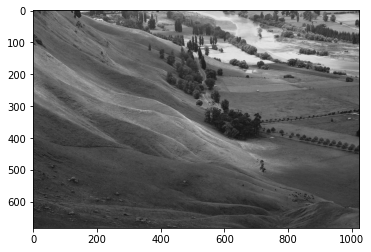

In [154]:
gray_img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

Text(0, 0.5, 'Frequencia')

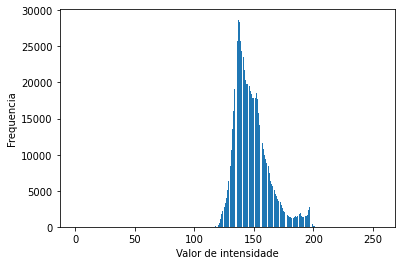

In [155]:
img_gray2 = gray_img
x = calcHistogram(img_gray2)

plt.bar(range(256), x)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequencia')

### img_aluno

Text(0, 0.5, 'Frequencia')

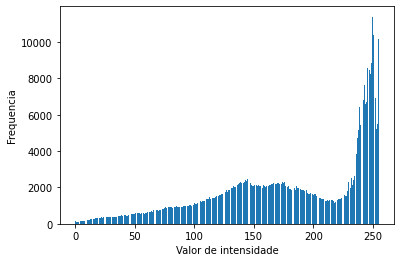

In [156]:
x = calcHistogram(img3)

plt.bar(range(256), x)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequencia')

Text(0, 0.5, 'Frequencia')

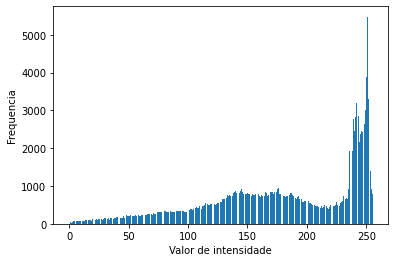

In [157]:
gray_img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
x = calcHistogram(gray_img3)
plt.bar(range(256), x)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequencia')

## histograma equalizado

In [158]:
def histogram_equalization(A, values):
    hist = calcHistogram(A)
     
    histC = np.zeros(hist.shape).astype(int)
    histC[0] = hist[0]
    for i in range(1, values):
        histC[i] = hist[i] + histC[i-1]
   
    N, M = A.shape
    hist_transform = np.zeros(values).astype(np.uint8)
    A_eq = np.zeros(A.shape).astype(np.uint8)

    for r in range(values):
        s = ((values-1)/float(M*N))*histC[r]
        A_eq[ np.where(A == r) ] = s
        hist_transform[r] = s
    
    return (A_eq, hist_transform)

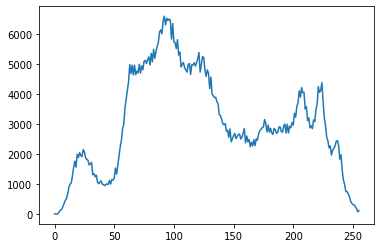

In [159]:
# lena
hist_img = calcHistogram(img1)
plt.plot(hist_img)

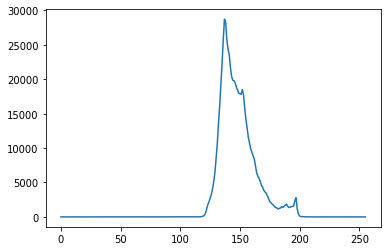

In [160]:
# unequalized
hist_img = calcHistogram(img2)
plt.plot(hist_img)

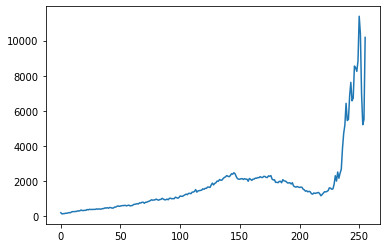

In [161]:
# img_aluno
hist_img = calcHistogram(img3)
plt.plot(hist_img)